Libraries used:
1. Matplotlib
2. Pandas

In [42]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Reading the data
df = pd.read_csv('result/task1_result.csv', date_format='%m/%d/%Y')
df.head(3)

,Subject,body,date,from,processed_text,sentiment,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,enronoptions announcement updated enronoptions...,positive,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,"marc , unfortunately , today going work revenu...",positive,1
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,": wednesday , june 06 , 2001 10:00 am-11:00 ( ...",neutral,0


In [45]:
#total number of records
print("Data Structure description:\n")
print(df.describe())

#data types
print("\nData Types:\n")
print(df.dtypes)

#number of null values
print("\nNumber of null values:\n")
print(df.isna().sum())


Data Structure description:

       sentiment_score
count      2191.000000
mean          0.660429
std           0.578677
min          -1.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000

Data Types:

Subject            object
body               object
date               object
from               object
processed_text     object
sentiment          object
sentiment_score     int64
dtype: object

Number of null values:

Subject             0
body                0
date                0
from                0
processed_text     31
sentiment           0
sentiment_score     0
dtype: int64


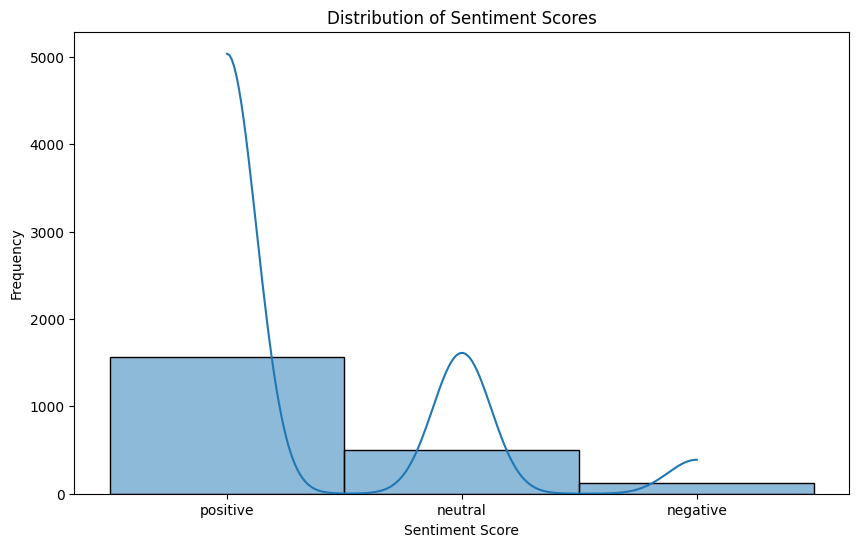

<Figure size 640x480 with 0 Axes>

In [46]:
#Distrubution of the data
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Visualisation/tsk2_sentiment_distribution.png')

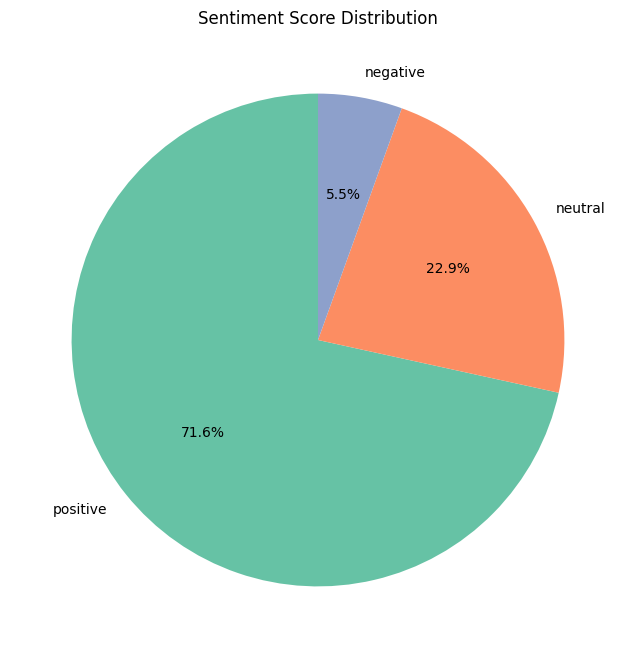

<Figure size 640x480 with 0 Axes>

In [58]:
#pie chart distribution of sentiment scores
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Score Distribution')
plt.ylabel('')
plt.show()
plt.savefig('Visualisation/tsk2_sentiment_pie_chart.png')

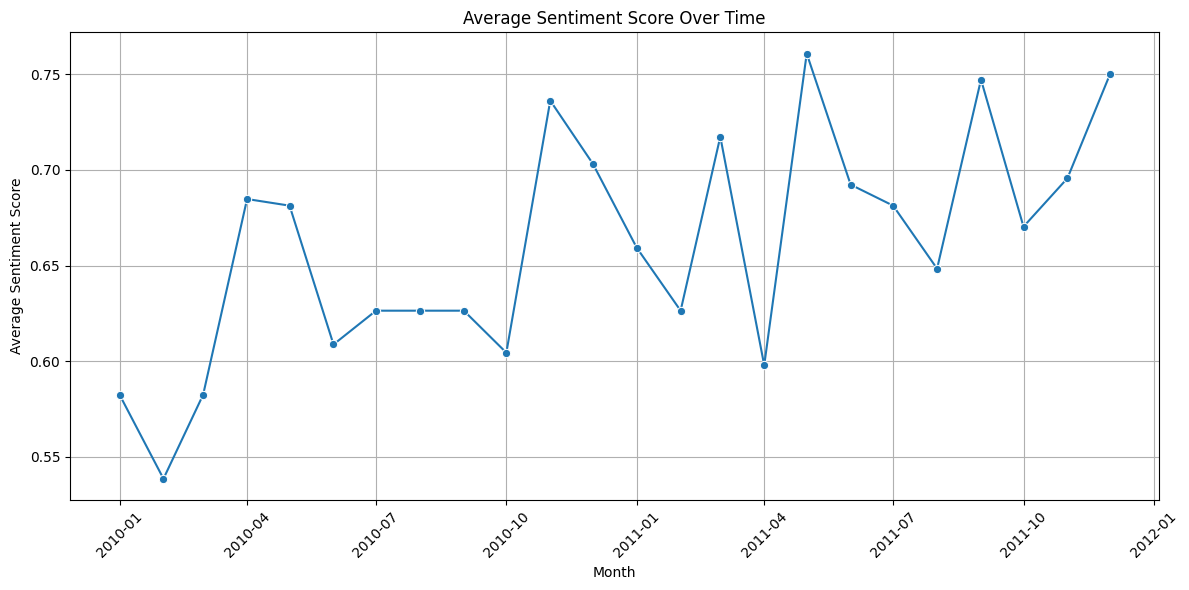

<Figure size 640x480 with 0 Axes>

In [ ]:
#trends over time(binning dates to months)
df['date'] = pd.to_datetime(df['date']) #parsing date column to date time format
df['month'] = df['date'].dt.to_period('M') #creating a new column for month
monthly_sentiment = df.groupby('month')['sentiment_score'].mean().reset_index() #grouping by month and calculating the mean sentiment score
monthly_sentiment['month'] = monthly_sentiment['month'].dt.to_timestamp() #converting month back to timestamp for plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sentiment, x='month', y='sentiment_score', marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
plt.savefig('Visualisation/tsk2_sentiment_trend_over_time.png')

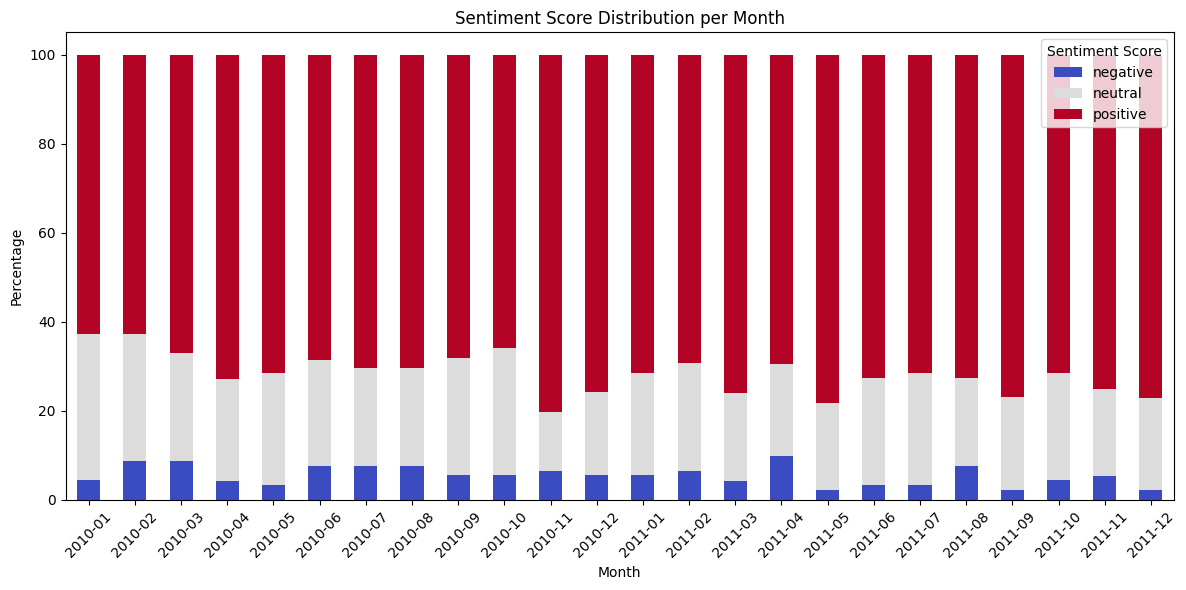

In [67]:
#sentiment score distribution per month
pivot = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_percent.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.ylabel('Percentage')

plt.title('Sentiment Score Distribution per Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Score', loc='upper right')
plt.tight_layout()
plt.savefig('Visualisation/tsk2_sentiment_monthly_distribution.png')